Next Steps:

1.) Run Light Python EDA

     Descrptive Stats

     Fraud vs non-fraud frequency

     Distributions of key variables (think premium, deductible, capital gains/loss)

     Correlation heatmap
    
     Outlier detection

2.) Move to Tableau Public 

     Visualize 4-5 of my most interesting relationships

     Build Dashboards to explain risk factors
    


In [1]:
#Lets first load the data csv file into a pandas dataframe
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned.csv')

In [6]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
#Now lets do some initial descriptive statistics and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Lets do some initial descriptive statistics and visualizations
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', None)         # let pandas decide width
print(df.describe(include='all').to_string())

        months_as_customer          age  policy_number policy_bind_date policy_state policy_csl  policy_deductable  policy_annual_premium  umbrella_limit    insured_zip insured_sex insured_education_level insured_occupation insured_hobbies insured_relationship  capital-gains   capital-loss incident_date            incident_type  collision_type incident_severity authorities_contacted incident_state incident_city incident_location  incident_hour_of_the_day  number_of_vehicles_involved property_damage  bodily_injuries    witnesses police_report_available  total_claim_amount  injury_claim  property_claim  vehicle_claim auto_make auto_model    auto_year fraud_reported
count          1000.000000  1000.000000    1000.000000             1000         1000       1000        1000.000000            1000.000000    9.990000e+02    1000.000000        1000                    1000               1000            1000                 1000    1000.000000    1000.000000          1000                     100

Some Initial Ideas For EDA based off the above information.

fraud target (e.g., fraud_reported / fraud) — required for all comparisons (fraud vs non‑fraud frequency, rates).


total_claim_amount / claim_amount — numeric, likely skewed and directly related to fraud/impact.


policy_annual_premium, policy_deductible — numeric financial features, check distributions and outliers.


age — demographic; distribution and relation to claim/fraud.


capital_gains, capital_loss (or similar) — numeric, often sparse/skewed; check for zeros/outliers.


incident_type, incident_severity, collision_type — low-cardinality categorical; good for grouping by fraud rate.


insured_sex, insured_education_level, policy_state — categorical demographics/location to test risk differences.


vehicle_make/model or vehicle_age — if present, useful for risk segmentation.
any date fields (incident_date, policy_bind_date) — convert to datetime and inspect recency/seasonality.

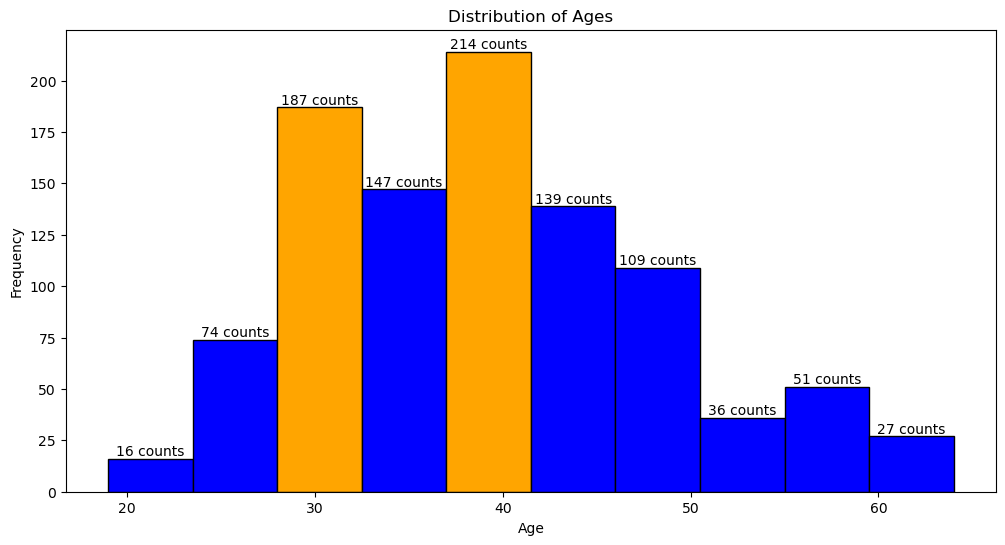

In [3]:
#Some of the most important columns to look at are:
#1. age, premium, deductible, capital gains/losses, and claim amount

#Lets look at the distribution of ages

# Plot histogram
bins = 10
plt.figure(figsize=(12,6))
counts, bins, patches = plt.hist(df['age'], bins=bins, edgecolor='black') 

# Find indices of top 2 bins by count
top_bins_idx = np.argsort(counts)[-2:]

# Color the top 2 bins differently
for i, patch in enumerate(patches):
    if i in top_bins_idx:
        patch.set_facecolor('orange')  # highlight color
    else:
        patch.set_facecolor('blue')    # default color

# Add count labels on top of each bar
for count, bin_edge in zip(counts, bins):
    if count > 0:  # only annotate if bin has data
        plt.text(bin_edge + (bins[1]-bins[0])/2, count,
                 f"{int(count)} counts", ha='center', va='bottom')

plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()